# SVM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score

from sklearn.preprocessing import MinMaxScaler  

from sklearn.svm import SVC



In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)
# this data file was created using the RF_no_nan_data.ipynb file which should be in the missing value imputation folder

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


In [4]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']

### Identifying most correlated features

In [5]:
correlations = data[data.columns[1:]].corr()['Severity'][:-1]  # Correlation of every column compared to Severity

In [6]:
correlations.sort_values(ascending=False)

Cervical_perimeter                 0.328530
Abdominal_perimeter                0.291886
Age                                0.273949
Weight                             0.234937
Respiratory_arrest                 0.193334
BMI                                0.188370
High_BP                            0.173079
Systolic_BP                        0.156997
Nocturia                           0.124376
Hypercholesterolemia               0.118788
Diastolic_BP                       0.118730
Former_smoker                      0.117382
Height                             0.106378
Diabetes                           0.102884
Memory_problem                     0.070916
Coronary_fail                      0.069477
Hypertriglyceridemia               0.062611
Arrhythmias                        0.060078
Myocardial_infarct                 0.057003
Heart_fail                         0.056822
Stroke                             0.047709
Sedentary                          0.047709
Snoring                         

### Wu et al. [25] 
age; body mass index; Epworth Sleepiness
Scale; waistline; neck circumference; and
difference of blood pressure before going
to sleep and early in the morning

In [7]:
wu = ['Age','BMI','Epworth_scale',  'Abdominal_perimeter', 'Cervical_perimeter','Systolic_BP', 'Diastolic_BP']
# The Wu paper included a feature described as "The difference of blood presure before going to sleep and early in the morning." 
# This dataset did not include that feature, so it is substituted here with disastolic and systolic BP

### Mencar et al. [15]
body mass index; gender; and Epworth
Sleepiness Scale

In [8]:
mencar = ['BMI', 'Sex', 'Epworth_scale']

### Huang et al. [12] 
age; waistline; neck circumference; snoring;
sleep onset latency; and witnessed apnea

In [9]:
huang = ['Age','Cervical_perimeter', 'Snoring']
# The Huang paper included the features: sleep onset latency and witnessed apnea
# This dataset did not included sleep onset latency data, and including results for witnessed apnea would skew the results so it was not included

### Ustun et al. [21] 
age; body mass index; gender; diabetes; hypertension; and tabagism (smoker status)

In [10]:
ustun = ['Age','BMI', 'Sex','Diabetes', 'High_BP', 'Current_smoker', 'Former_smoker']

### Rodruiges Jr et al.
age; nocturia frequency; body mass index;
depression score; neck circumference; hip
measurement; diastolic blood pressure; and
tabagism

In [11]:
rodruiges = ['Age', 'Nocturia', 'BMI', 'Depression_scale', 'Cervical_perimeter', 'Abdominal_perimeter', 'Diastolic_BP', 'Current_smoker', 'Former_smoker' ]

### Categories

In [12]:
demographic = ['Sex','Age','Current_smoker','Former_smoker','Sedentary']

In [13]:
measurements = ['Height','Weight','Cervical_perimeter',
               'Abdominal_perimeter','Systolic_BP','Diastolic_BP','Maxillofacial_profile','BMI','High_BP']

In [14]:
comorbidities = ['Asthma','Rhinitis','COPD','Respiratory_fail','Myocardial_infarct','Coronary_fail','Arrhythmias','Stroke',
                 'Heart_fail','Arteriopathy','Gastric_reflux','Glaucoma','Diabetes','Hypercholesterolemia','Hypertriglyceridemia',
                 'Hypo(er)thyroidism','Depression','Obesity','Dysmorphology','Restless_Leg_Syndrome']

In [15]:
symptoms=['Snoring','Diurnal_somnolence','Driving_drowsiness','Morning_fatigue','Morning_headache','Memory_problem',
          'Nocturnal_perspiration','Shortness_of_breath_on_exertion','Nocturia','Drowsiness_accident','Near_miss_accident',
          'Respiratory_arrest']

In [16]:
questionnaires = ['Epworth_scale','Pichots_scale','Depression_scale']

In [17]:
correlated_10 = ['Cervical_perimeter', 'Abdominal_perimeter', 'Age', 'Weight', 'Respiratory_arrest', 'BMI', 'High_BP',
                 'Systolic_BP', 'Nocturia', 'Hypercholesterolemia']

In [18]:
rf_imp = ['Age', 'BMI', 'Abdominal_perimeter', 'Weight', 'Height', 'Cervical_perimeter', 'Pichots_scale', 'Epworth_scale', 
          'Systolic_BP', 'Diastolic_BP']

# These are the 10 most important features as identified by the Random Forest model

## Models

##### Note: Feature scaling is essential for machine learning algorithms that calculate distances between data

### Creating dictionary of feature sets

In [19]:
feature_list = {}

feature_list['All']= features
feature_list['Wu'] = wu
feature_list['Mencar'] = mencar
feature_list['Ustun'] = ustun
feature_list['Huang'] = huang
feature_list['Rodruiges'] = rodruiges
feature_list['Demographic'] = demographic
feature_list['Measurements'] = measurements
feature_list['Comorbidities'] = comorbidities
feature_list['Symptoms'] = symptoms
feature_list['Questionnaires'] = questionnaires
feature_list['Correlated'] = correlated_10
feature_list['Important_RF'] = rf_imp



### SVM on different feature sets

In [20]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    # Data needs to be scaled
    scaler = MinMaxScaler()  
    # Scale only on training data
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test) 
    
    clf=SVC(class_weight='balanced', random_state = 0)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [21]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.382951,0.452532,0.426444
Wu,0.365106,0.446196,0.408570
Mencar,0.337205,0.475466,0.372823
Ustun,0.336384,0.490645,0.394134
Huang,0.351691,0.485304,0.406737
Rodruiges,0.361171,0.451080,0.409487
Demographic,0.311235,0.524143,0.384968
Measurements,0.340336,0.469215,0.383593
Comorbidities,0.301702,0.478866,0.284143
Symptoms,0.304347,0.394143,0.341659


### Testing different kernels

##### Sigmoid kernel

In [22]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
 # Data needs to be scaled
scaler = MinMaxScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test)  

clf=SVC(class_weight='balanced', random_state = 0, kernel = 'sigmoid')  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

print('Balanced accuracy:', balanced_accuracy_score(predictions, y_test))

Balanced accuracy: 0.27173985843909976


##### RBF kernel

In [24]:
clf=SVC(class_weight='balanced', random_state = 0, kernel = 'rbf')  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

print('Balanced accuracy:', balanced_accuracy_score(predictions, y_test))

Balanced accuracy: 0.38295131000861204


##### Linear kernel

In [25]:
clf=SVC(class_weight='balanced', random_state = 0, kernel = 'linear')  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

print('Balanced accuracy:', balanced_accuracy_score(predictions, y_test))

Balanced accuracy: 0.38376868494244487


##### Poly kernel

In [26]:
clf=SVC(class_weight='balanced', random_state = 0, kernel = 'poly')  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

print('Balanced accuracy:', balanced_accuracy_score(predictions, y_test))

Balanced accuracy: 0.37979449504528545


### Adjusting C RBF  

* Using RBF because it performed well and linear models are not sensitive to C

In [31]:
clf=SVC(class_weight='balanced', random_state = 0, kernel = 'rbf', C = 0.5)  #C = 0.5
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

print('Balanced accuracy:', balanced_accuracy_score(predictions, y_test))

Balanced accuracy: 0.3861769851584168


In [28]:
clf=SVC(class_weight='balanced', random_state = 0, kernel = 'rbf', C = 2)  #C = 2
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

print('Balanced accuracy:', balanced_accuracy_score(predictions, y_test))

Balanced accuracy: 0.3793608560133631


In [29]:
clf=SVC(class_weight='balanced', random_state = 0, kernel = 'rbf', C = 0.2)  #C = 0.2
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

In [30]:
print('Balanced accuracy:', balanced_accuracy_score(predictions, y_test))

Balanced accuracy: 0.38255743888218513


### Best model confusion matrix

rbf, C = 0.5

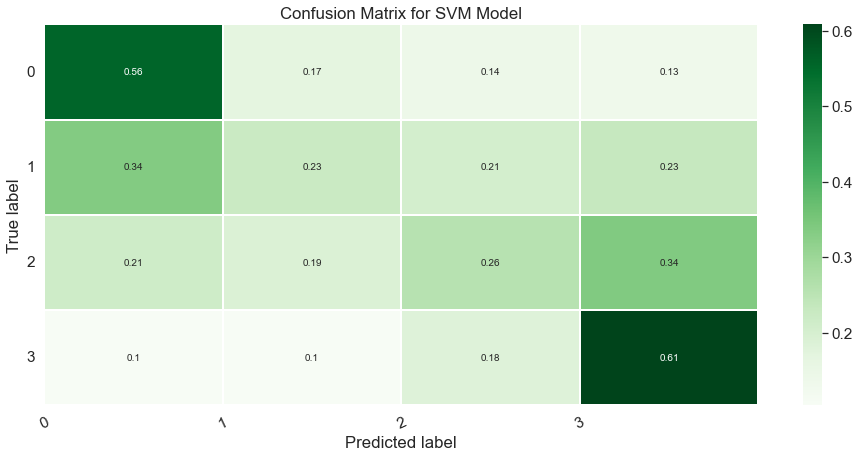

In [32]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Model')
plt.show()